**READING THE DATASET**

In [2]:
# LOAD THE LIBRARIES
import pandas as pd
import numpy as np
import pandas_profiling as pp
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks

# Importing all necessary libraries

from math import sqrt
import xgboost as xgb
import lightgbm as lgb
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from functools import partial
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from bayes_opt import BayesianOptimization
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge, Lasso

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score, KFold
from pprint import pprint

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [3]:
train = pd.read_csv('./ReNew_Participants_Data/train.csv')
test = pd.read_csv('./ReNew_Participants_Data/test.csv')

print("The Wind Turbine training dataset has", train.shape[0], "records, each with",train.shape[1],"attributes.")
print("The Wind Turbine test dataset has", test.shape[0], "records, each with",test.shape[1],"attributes.")

train.head()

The Wind Turbine training dataset has 909604 records, each with 16 attributes.
The Wind Turbine test dataset has 303202 records, each with 14 attributes.


,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target
0,2021-02-19 20:18:00,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,165.501518,280.864782,7.057000,0.544082,Turbine_108,47.582787
1,2021-04-27 04:55:00,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,113.835236,299.552460,5.474937,0.469031,Turbine_18,46.070328
2,2021-01-25 06:26:00,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,281.452253,84.960106,8.092457,0.622318,Turbine_105,39.989236
3,2021-10-30 03:47:00,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,75.017531,87.261119,4.071032,0.760719,Turbine_15,46.056587
4,2021-03-15 00:39:00,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,160.202421,313.724818,6.357943,0.346068,Turbine_01,54.346095


In [4]:
test.head()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id
0,15.507537,19.956882,40.233264,410.538834,57.357366,84.008399,48.826597,45.363477,2.419202,1.468876,156.399396,2.438629,0.790435,Turbine_14
1,472.577255,478.373881,12.306687,965.077563,51.796728,492.531362,27.457511,24.045565,96.152070,119.378235,56.443802,5.900371,0.544198,Turbine_19
2,447.829615,451.158264,29.106771,948.035899,60.493098,393.151576,39.410553,35.715697,90.251529,117.192635,224.540263,5.924923,0.513481,Turbine_14
3,254.014336,249.438965,27.074900,804.963776,55.741899,178.715101,29.476841,31.151895,89.273838,105.086257,182.151426,4.409707,0.448881,Turbine_120
4,1174.930566,1202.654077,32.148434,1199.754858,67.272313,1115.850317,31.920549,30.864276,189.731988,236.053320,261.672180,7.822326,0.561465,Turbine_158


In [5]:
# Drop the timestamp column
train.drop(['timestamp', 'turbine_id'], axis=1,inplace=True)
test.drop('turbine_id', axis=1, inplace=True)

In [6]:
# Check for null
train.isnull().sum()

active_power_calculated_by_converter      0
active_power_raw                          0
ambient_temperature                       0
generator_speed                           0
generator_winding_temp_max                0
grid_power10min_average                   0
nc1_inside_temp                           0
nacelle_temp                              0
reactice_power_calculated_by_converter    0
reactive_power                            0
wind_direction_raw                        0
wind_speed_raw                            0
wind_speed_turbulence                     0
Target                                    0
dtype: int64

There are no NULL values to deal with.

In [7]:
for c in train:
    q1 = train[c].quantile(0.25)
    q3 = train[c].quantile(0.75)
    iqr = q3 - q1
    fence_low = q3 - 1.5*iqr
    fence_high = q1 + 1.5*iqr
    lower_out = len(train.loc[(train[c] < fence_low), c])
    upper_out = len(train.loc[(train[c] > fence_high), c])
    outlier_count = lower_out + upper_out
    prop_outlier = outlier_count/len(train)
    print(c, ": "+"{:.2%}".format(prop_outlier))

active_power_calculated_by_converter : 14.09%
active_power_raw : 14.16%
ambient_temperature : 1.49%
generator_speed : 1.66%
generator_winding_temp_max : 22.78%
grid_power10min_average : 13.61%
nc1_inside_temp : 20.90%
nacelle_temp : 25.87%
reactice_power_calculated_by_converter : 35.88%
reactive_power : 31.05%
wind_direction_raw : 0.19%
wind_speed_raw : 14.73%
wind_speed_turbulence : 15.17%
Target : 19.60%


**Count of outliers**

In [8]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).sum()

active_power_calculated_by_converter       23310
active_power_raw                           22565
ambient_temperature                            0
generator_speed                             6247
generator_winding_temp_max                 37362
grid_power10min_average                    15593
nc1_inside_temp                            73082
nacelle_temp                               77431
reactice_power_calculated_by_converter    188343
reactive_power                            164946
wind_direction_raw                             0
wind_speed_raw                             10706
wind_speed_turbulence                      29570
Target                                     31463
dtype: int64

**Removing Outliers**

In [9]:
train_new = train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]
train_new.shape

(597324, 14)

In [10]:
train_new.head()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,Target
0,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,165.501518,280.864782,7.057000,0.544082,47.582787
1,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,113.835236,299.552460,5.474937,0.469031,46.070328
3,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,75.017531,87.261119,4.071032,0.760719,46.056587
5,603.877940,620.637583,28.055220,955.604563,60.882138,697.721731,31.012207,31.054668,57.950467,75.779110,229.571665,6.026029,0.779887,47.947959
9,468.044851,469.828186,17.189911,876.035055,63.952785,675.510671,31.469155,33.117485,87.047708,119.317791,175.583277,4.864594,0.996903,47.616581


# **SCALING FEATURES**

In [11]:
log_feature = ['active_power_calculated_by_converter', 'active_power_raw',
       'ambient_temperature', 'generator_speed', 'generator_winding_temp_max',
       'grid_power10min_average', 'nc1_inside_temp', 'nacelle_temp',
       'reactice_power_calculated_by_converter', 'reactive_power',
       'wind_direction_raw','wind_speed_raw', 'wind_speed_turbulence']

for x in log_feature:
    train_new[x] = train_new[x].apply(lambda t : 0.000001 if t <= 0 else t)
    train_new[x] = np.log(train_new[x])
    test[x] = test[x].apply(lambda t : 0.000001 if t <= 0 else t)
    test[x] = np.log(test[x])

# Scaling the Data Sets 
from sklearn.preprocessing import StandardScaler

scale_features = ['active_power_calculated_by_converter', 'active_power_raw',
       'ambient_temperature', 'generator_speed', 'generator_winding_temp_max',
       'grid_power10min_average', 'nc1_inside_temp', 'nacelle_temp',
       'reactice_power_calculated_by_converter', 'reactive_power',
       'wind_direction_raw','wind_speed_raw', 'wind_speed_turbulence']
scale = StandardScaler()
for fs in scale_features:
    train_new[fs] = scale.fit_transform(train_new[[fs]])
    test[fs] = scale.fit_transform(test[[fs]])

train_new.shape

/var/folders/jq/9pvkyf4n2b7crtzvgqdbjz7m0000gn/T/ipykernel_38959/1490728671.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_new[x] = train_new[x].apply(lambda t : 0.000001 if t <= 0 else t)
/var/folders/jq/9pvkyf4n2b7crtzvgqdbjz7m0000gn/T/ipykernel_38959/1490728671.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_new[x] = np.log(train_new[x])
/var/folders/jq/9pvkyf4n2b7crtzvgqdbjz7m0000gn/T/ipykernel_38959/1490728671.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of

(597324, 14)

In [12]:
X = train_new.drop('Target', axis=1)
y= train_new['Target']

In [13]:
X.head()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence
0,1.012214,0.993390,0.755478,1.578103,0.957531,1.030526,0.049581,-0.086088,1.181745,1.163211,0.670783,1.088926,-0.009283
1,0.356595,0.357945,-1.811039,0.192725,0.069335,0.393075,0.280459,0.448445,-0.002906,0.131084,0.745934,0.047702,-0.384161
3,-1.529644,-1.557384,0.441071,-0.978560,-3.260325,-2.638500,1.032607,0.409468,-0.767937,-1.019091,-0.692983,-1.167627,0.837214
5,0.715571,0.718091,0.407404,0.370614,0.259263,0.788635,-0.329434,-0.283584,-1.110175,-0.991232,0.435520,0.441105,0.900064
9,0.465136,0.459691,-0.990582,-0.171900,0.688631,0.760103,-0.129005,0.599192,-0.065244,0.260817,0.122742,-0.437132,1.520115


In [14]:
X.shape

(597324, 13)

In [15]:
X.skew(axis=0)

active_power_calculated_by_converter     -1.319994
active_power_raw                         -1.376397
ambient_temperature                      -0.834383
generator_speed                           0.472471
generator_winding_temp_max               -0.411222
grid_power10min_average                  -1.621866
nc1_inside_temp                          -0.148442
nacelle_temp                             -0.570470
reactice_power_calculated_by_converter   -1.459553
reactive_power                           -1.142383
wind_direction_raw                       -1.541526
wind_speed_raw                           -0.186020
wind_speed_turbulence                    -0.137877
dtype: float64

**DATA VISUALIZATION**

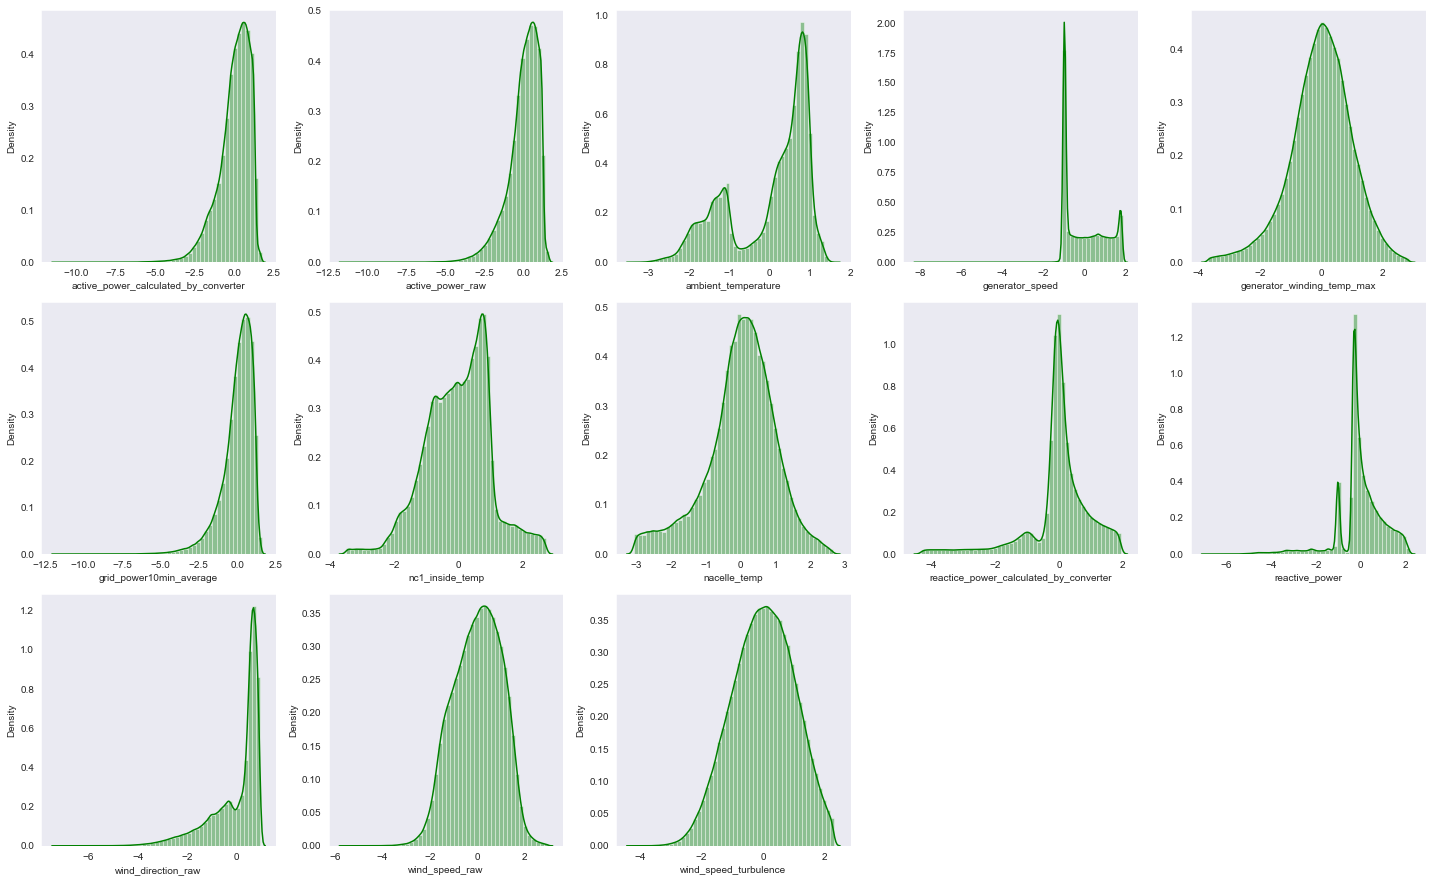

In [16]:
# Plotting the distributions of the numerical features
plt.figure(figsize=(20,16))

for i, col in enumerate(list(X)):
    plt.subplot(4,5,i+1)
    sns.distplot(X[col], color='g', kde=True, label='data')
    plt.grid()
    plt.tight_layout()

# **FEATURE ENGINEERING** #

In [17]:
#X['wind_turbulence_intensity'] = X['wind_speed_turbulence']/X['wind_speed_raw']
X['apparent_power']=(np.abs(X['reactive_power']**2+X['active_power_raw'])**2)**0.5
X['power_factor']=X['active_power_raw']/X['apparent_power']

#test['wind_turbulence_intensity'] = test['wind_speed_turbulence']/test['wind_speed_raw']
test['apparent_power']=(np.abs(test['reactive_power']**2+test['active_power_raw'])**2)**0.5
test['power_factor']=test['active_power_raw']/test['apparent_power']

In [18]:
X = X.drop(['apparent_power', 'reactive_power', 'active_power_raw'], axis=1)
test = test.drop(['apparent_power', 'reactive_power', 'active_power_raw'], axis=1)
#test['wind_turbulence_intensity'] = test['wind_speed_turbulence'] / test['wind_speed_raw']

In [19]:
X.head()

,active_power_calculated_by_converter,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,power_factor
0,1.012214,0.755478,1.578103,0.957531,1.030526,0.049581,-0.086088,1.181745,0.670783,1.088926,-0.009283,0.423359
1,0.356595,-1.811039,0.192725,0.069335,0.393075,0.280459,0.448445,-0.002906,0.745934,0.047702,-0.384161,0.954194
3,-1.529644,0.441071,-0.978560,-3.260325,-2.638500,1.032607,0.409468,-0.767937,-0.692983,-1.167627,0.837214,-3.001676
5,0.715571,0.407404,0.370614,0.259263,0.788635,-0.329434,-0.283584,-1.110175,0.435520,0.441105,0.900064,0.422249
9,0.465136,-0.990582,-0.171900,0.688631,0.760103,-0.129005,0.599192,-0.065244,0.122742,-0.437132,1.520115,0.871095


# **FEATURE SELECTION**

In [20]:
X.shape[1]

12

**Correlation check for multi-collinearity**

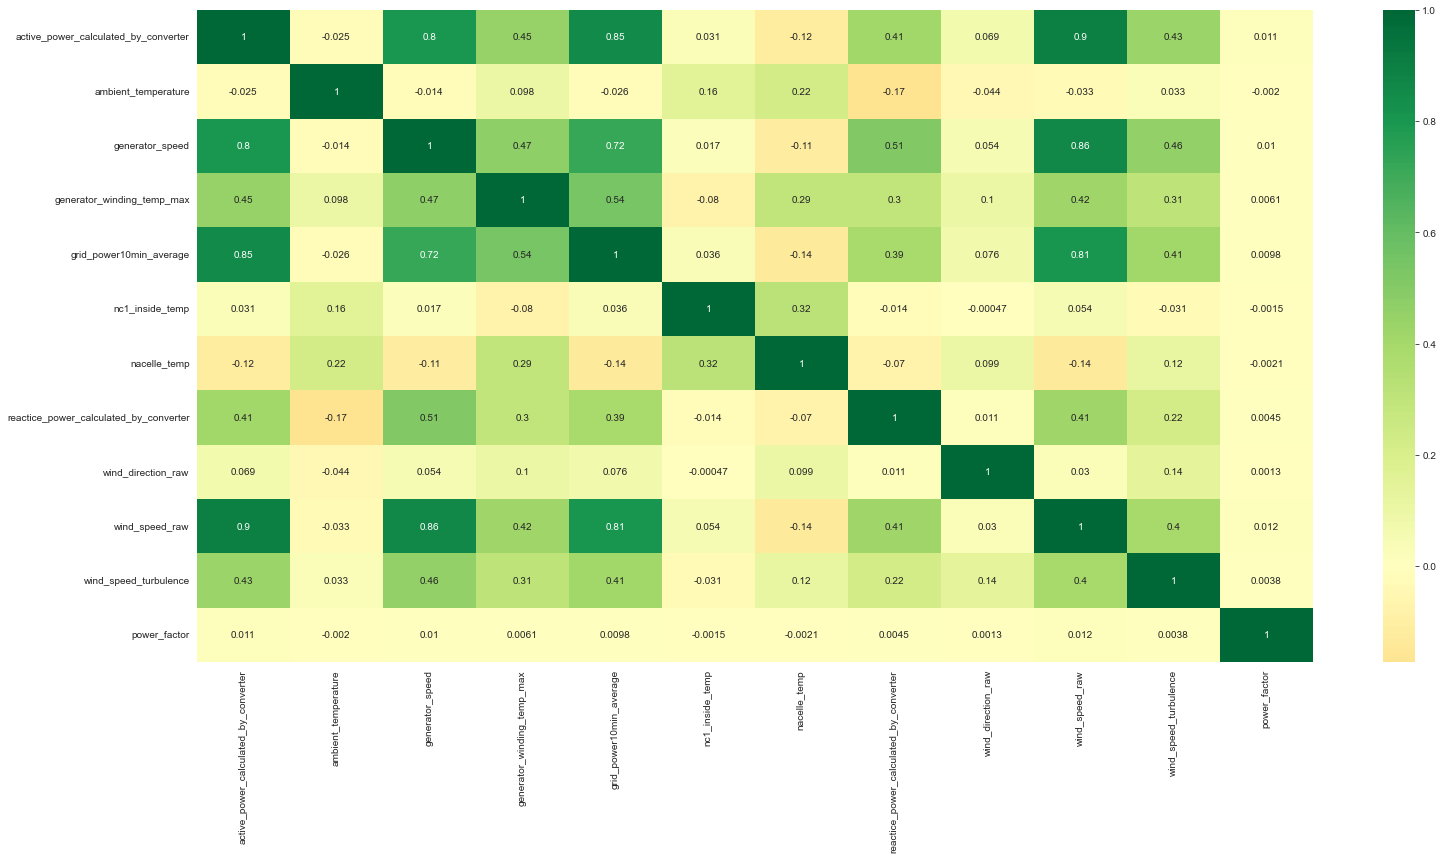

In [21]:
# Plotting a heatmap plot

from turtle import color
plt.figure(figsize=(25,12))
p = sns.heatmap(data=X.corr(method='pearson'), cmap='RdYlGn', annot=True, center=0)

**Correlation of Independent Variables**

Based on the coefficient values some of the independent variables are highly correlated to each other (value >=0.8). This means we may need to drop one of these to ensure we do not overfit the model. We will analyze further with some other methods (VIF, Feature Selection and Embedded methods) to come to an optimal set of features.

* active_power_calculated_by_converter & active_power_raw 
* active_power_calculated_by_converter & wind_speed_raw
* active_power_calculated_by_converter & grid_power10min_average
* active_power_raw & wind_speed_raw
* active_power_raw & grid_power10min_average
* generator_speed & active_power_calculated_by_converter  
* reactice_power_calculated_by_converter & reactive_power

In [22]:
X.corrwith(y)

active_power_calculated_by_converter     -0.014336
ambient_temperature                       0.356471
generator_speed                          -0.003418
generator_winding_temp_max                0.368094
grid_power10min_average                  -0.022232
nc1_inside_temp                          -0.024253
nacelle_temp                              0.463522
reactice_power_calculated_by_converter   -0.083580
wind_direction_raw                        0.096312
wind_speed_raw                           -0.031773
wind_speed_turbulence                     0.079113
power_factor                              0.001092
dtype: float64

**VIF Check**

In [23]:
# Import VIF library for multi-collinearity check
from statsmodels.stats.outliers_influence import variance_inflation_factor 

def calc_vif(dataframe):

    # calculating VIF
    vif = pd.DataFrame()
    vif["Variables"] = dataframe.columns
    vif["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    vif = vif.sort_values(ascending=False, by="VIF")
    return(vif)

calc_vif(X) 

,Variables,VIF
9,wind_speed_raw,8.009895
0,active_power_calculated_by_converter,7.135677
2,generator_speed,4.910134
4,grid_power10min_average,4.653838
3,generator_winding_temp_max,2.095296
6,nacelle_temp,1.683093
7,reactice_power_calculated_by_converter,1.439732
10,wind_speed_turbulence,1.396793
5,nc1_inside_temp,1.288672
1,ambient_temperature,1.119279


* VIF starts at 1 and has no upper limit
* VIF = 1, no correlation between the independent variable and the other variables
* VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

In [24]:
X = X.drop('wind_speed_raw', axis=1)
calc_vif(X)

,Variables,VIF
0,active_power_calculated_by_converter,5.043785
4,grid_power10min_average,4.528509
2,generator_speed,3.436479
3,generator_winding_temp_max,2.066102
6,nacelle_temp,1.682928
7,reactice_power_calculated_by_converter,1.428652
9,wind_speed_turbulence,1.385957
5,nc1_inside_temp,1.285030
1,ambient_temperature,1.117400
8,wind_direction_raw,1.037695


In [25]:
X = X.drop('active_power_calculated_by_converter', axis=1)
calc_vif(X)

,Variables,VIF
3,grid_power10min_average,2.642913
1,generator_speed,2.634368
2,generator_winding_temp_max,2.035368
5,nacelle_temp,1.677360
6,reactice_power_calculated_by_converter,1.427328
8,wind_speed_turbulence,1.384107
4,nc1_inside_temp,1.283991
0,ambient_temperature,1.117300
7,wind_direction_raw,1.037654
9,power_factor,1.000132


**Wrapper Methods**

* Sequential Feature Selector - Forward Selection 
* Backward Elimination - Recursive Feature Elimination (RFE)
* Stepwise Selection: Bi-directional with a combination of Forward Selection & Backward Elimination

**Forward Selection Method - SFS() from Mlxtend**

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.8s finished
Features: 1/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.8s finished
Features: 2/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.8s finished
Features: 3/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.7s finished
Features: 4/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.6s finished
Features: 5/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.4s finished
Features: 6/10[Parallel(

                                  Feature     Score
0                     ambient_temperature  0.378961
1                         generator_speed  0.378961
2              generator_winding_temp_max  0.378961
3                 grid_power10min_average  0.378961
4                         nc1_inside_temp  0.378961
5                            nacelle_temp  0.378961
6  reactice_power_calculated_by_converter  0.378961
7                      wind_direction_raw  0.378961


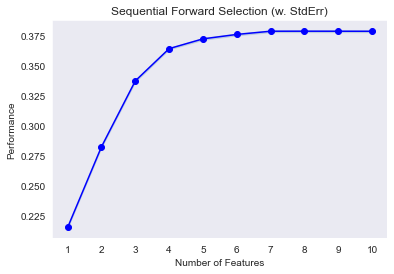

In [48]:
# Sequential Feature Selection (SFS)
sfs = SFS(LinearRegression(), forward=True, floating=False, scoring='r2', cv=5, k_features='best', verbose=1)
sfs.fit(X, y)

feat_names = pd.DataFrame({'Feature' : sfs.k_feature_names_, 'Score' : sfs.k_score_})
print(feat_names.sort_values(by=['Score'], ascending=False))

fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.8s finished
Features: 9/1[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.8s finished
Features: 8/1[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.4s finished
Features: 7/1[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.0s finished
Features: 6/1[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.6s finished
Features: 5/1[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.2s finished
Features: 4/1[Parallel(n_jobs

                                  Feature     Score
0                     ambient_temperature  0.378961
1                         generator_speed  0.378961
2              generator_winding_temp_max  0.378961
3                 grid_power10min_average  0.378961
4                         nc1_inside_temp  0.378961
5                            nacelle_temp  0.378961
6  reactice_power_calculated_by_converter  0.378961
7                      wind_direction_raw  0.378961


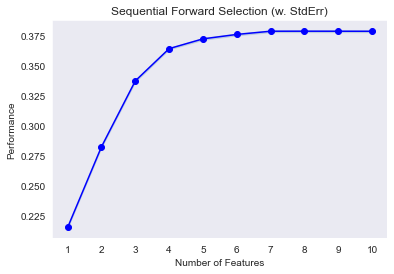

In [49]:
# Sequential Feature Selection (SFS)
sfs_b = SFS(LinearRegression(), forward=False, floating=False, scoring='r2', cv=5, k_features='best', verbose=1)
sfs_b.fit(X, y)

feat_names_1 = pd.DataFrame({'Feature' : sfs_b.k_feature_names_, 'Score' : sfs_b.k_score_})
print(feat_names_1.sort_values(by=['Score'], ascending=False))

fig = plot_sfs(sfs_b.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

**SelectKBest with Pearson's f_regression**

In [50]:
best_features = SelectKBest(score_func=f_regression, k='all')
fit = best_features.fit(X,y)

feat_scores = pd.DataFrame({'Feature': X.columns, 'Pearsons Score' : fit.scores_})
print(feat_scores.sort_values(by=['Pearsons Score'], ascending=False))

                                  Feature  Pearsons Score
5                            nacelle_temp   163455.374222
2              generator_winding_temp_max    93617.499036
0                     ambient_temperature    86951.798115
7                      wind_direction_raw     5592.634342
6  reactice_power_calculated_by_converter     4201.988821
4                         nc1_inside_temp      351.550237
3                 grid_power10min_average      295.377387
1                         generator_speed        6.977313
8               wind_turbulence_intensity        1.493659
9                            power_factor        0.712081


In [51]:
Kbest_features = feat_scores.nlargest(8, 'Pearsons Score')
print(Kbest_features)

                                  Feature  Pearsons Score
5                            nacelle_temp   163455.374222
2              generator_winding_temp_max    93617.499036
0                     ambient_temperature    86951.798115
7                      wind_direction_raw     5592.634342
6  reactice_power_calculated_by_converter     4201.988821
4                         nc1_inside_temp      351.550237
3                 grid_power10min_average      295.377387
1                         generator_speed        6.977313


**Recursive Forward Elimination Method RFE() from Sklearn**

In [52]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
np.random.seed(123)
#names = pd.DataFrame(X.columns)
model = LinearRegression()

#Define RFE 
rfe = RFECV(model, step=1, cv=150) 
my_values = rfe.fit(X,y)

#Create a dataframe for the results
df_RFE_results = []
for i in range(X.shape[1]):
    df_RFE_results.append(
        {
            'Feature' : X.columns[i],
            'Selected' : my_values.support_[i],
            'RFE_Ranking' : my_values.ranking_[i]
        }
    )

df_RFE_results = pd.DataFrame(df_RFE_results)
df_RFE_results.index.name = 'Columns'
df_RFE_results

,Feature,Selected,RFE_Ranking
Columns,,,
0,ambient_temperature,True,1
1,generator_speed,True,1
2,generator_winding_temp_max,True,1
3,grid_power10min_average,True,1
4,nc1_inside_temp,True,1
5,nacelle_temp,True,1
6,reactice_power_calculated_by_converter,True,1
7,wind_direction_raw,True,1
8,wind_turbulence_intensity,False,3


In [53]:
RFE_features = df_RFE_results[df_RFE_results['RFE_Ranking'] == 1]
print(RFE_features)

                                        Feature  Selected  RFE_Ranking
Columns                                                               
0                           ambient_temperature      True            1
1                               generator_speed      True            1
2                    generator_winding_temp_max      True            1
3                       grid_power10min_average      True            1
4                               nc1_inside_temp      True            1
5                                  nacelle_temp      True            1
6        reactice_power_calculated_by_converter      True            1
7                            wind_direction_raw      True            1


In [54]:
feat_list = {
            'SFS Forward' : feat_names['Feature'],
            'SFS Backward' : feat_names_1['Feature'],
            'SelectKBest' : Kbest_features['Feature'],
            'RFECV' : RFE_features['Feature']
            }
key_features = pd.DataFrame(feat_list)
key_features = key_features.apply(lambda x: pd.Series(x.dropna().values))
key_features

,SFS Forward,SFS Backward,SelectKBest,RFECV
0,ambient_temperature,ambient_temperature,ambient_temperature,ambient_temperature
1,generator_speed,generator_speed,generator_speed,generator_speed
2,generator_winding_temp_max,generator_winding_temp_max,generator_winding_temp_max,generator_winding_temp_max
3,grid_power10min_average,grid_power10min_average,grid_power10min_average,grid_power10min_average
4,nc1_inside_temp,nc1_inside_temp,nc1_inside_temp,nc1_inside_temp
5,nacelle_temp,nacelle_temp,nacelle_temp,nacelle_temp
6,reactice_power_calculated_by_converter,reactice_power_calculated_by_converter,reactice_power_calculated_by_converter,reactice_power_calculated_by_converter
7,wind_direction_raw,wind_direction_raw,wind_direction_raw,wind_direction_raw


In [56]:
X = X.drop(['power_factor','wind_turbulence_intensity'], axis=1)

In [57]:
X.shape

(597324, 8)

# Train Test Split

In [58]:
# SPLIT TRAIN DATASET INTO TRAIN & VALIDATION TO TEST MODEL BEFORE PREDICTING ON TEST DATASET

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(537591, 8) (537591,) (59733, 8) (59733,)


# **BUILDING A BASE MODEL** 

**LINEAR REGRESSION**

In [59]:
%%time
# Fit a simple Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

lr_train_acc = (lr_model.score(X_train, y_train))*100
lr_val_acc = (lr_model.score(X_test, y_test))*100
mape_lr = mean_absolute_percentage_error(y_test, lr_pred)

print(f"Training accuracy: {lr_train_acc} %")
print(f"Validation accuracy: {lr_val_acc} %")
print(f"Linear Regression Mean Absolute Percent Error: {mape_lr}")

Training accuracy: 37.84141720604123 %
Validation accuracy: 38.413377571711 %
Linear Regression Mean Absolute Percent Error: 0.024922357570902973
CPU times: user 170 ms, sys: 72.3 ms, total: 242 ms
Wall time: 128 ms


**RANDOM FOREST REGRESSION**

In [66]:
%%time
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_train_acc = (rf_model.score(X_train, y_train))*100
rf_val_acc = (rf_model.score(X_test, y_test))*100
mape_rf = mean_absolute_percentage_error(y_test, rf_pred)

print(f"Training accuracy: {rf_train_acc} %")
print(f"Validation accuracy: {rf_val_acc} %")
print(f"Random Forest Model Mean Absolute Percent Error: {mape_rf}")

Training accuracy: 96.63937922886325 %
Validation accuracy: 76.13775288767606 %
Random Forest Model Mean Absolute Percent Error: 0.014082562990738467
CPU times: user 8min 12s, sys: 7.03 s, total: 8min 19s
Wall time: 8min 23s


**LIGHTGBM REGRESSION**

In [61]:
%%time
lgb_model = LGBMRegressor(n_estimators=1000)
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)

lgb_train_acc = (lgb_model.score(X_train, y_train))*100
lgb_val_acc = (lgb_model.score(X_test, y_test))*100
mape_lgb = mean_absolute_percentage_error(y_test, lgb_pred)

print(f"Training accuracy: {lgb_train_acc} %")
print(f"Validation accuracy: {lgb_val_acc} %")
print(f"LightGBM Model Mean Absolute Percent Error: {mape_lgb}")

Training accuracy: 70.55937262743429 %
Validation accuracy: 68.16626479288999 %
LightGBM Model Mean Absolute Percent Error: 0.01740494384610327
CPU times: user 1min 9s, sys: 4.35 s, total: 1min 13s
Wall time: 10.2 s


**XGB REGRESSION**

In [64]:
%%time
# XG Boost Regressor
XGB_model = XGBRegressor(booster='gbtree', n_estimators=200, max_depth=12, random_state=42)
XGB_model.fit(X_train, y_train)
XGB_pred = XGB_model.predict(X_test)

xg_train_acc = (XGB_model.score(X_train, y_train))*100
xg_val_acc = (XGB_model.score(X_test, y_test))*100
mape_xg = mean_absolute_percentage_error(y_test, XGB_pred)

print(f"Training accuracy: {xg_train_acc} %")
print(f"Validation accuracy: {xg_val_acc} %")
print(f"XGBoost Model Mean Absolute Percent Error: {mape_xg}")

Training accuracy: 85.13250908210014 %
Validation accuracy: 70.65735485550881 %
XGBoost Model Mean Absolute Percent Error: 0.016453097643526458
CPU times: user 10min, sys: 29.9 s, total: 10min 30s
Wall time: 1min 26s


**CATBOOST REGRESSOR**

In [65]:
%%time
from catboost import CatBoostRegressor, cv

cat_model = CatBoostRegressor(iterations=200, learning_rate=0.7, loss_function='MAPE', random_state=42)
cat_model.fit(X_train, y_train)
cat_pred = cat_model.predict(X_test)

cat_train_acc = (cat_model.score(X_train, y_train))*100
cat_val_acc = (cat_model.score(X_test, y_test))*100
mape_cat = mean_absolute_percentage_error(y_test, cat_pred)

print(f"Training accuracy: {cat_train_acc} %")
print(f"Validation accuracy: {cat_val_acc} %")
print(f"CatBoost Model Mean Absolute Percent Error: {mape_cat}")

0:	learn: 0.0279084	total: 118ms	remaining: 23.4s
1:	learn: 0.0255109	total: 156ms	remaining: 15.4s
2:	learn: 0.0241035	total: 196ms	remaining: 12.9s
3:	learn: 0.0232801	total: 235ms	remaining: 11.5s
4:	learn: 0.0227405	total: 273ms	remaining: 10.7s
5:	learn: 0.0223870	total: 311ms	remaining: 10s
6:	learn: 0.0221974	total: 356ms	remaining: 9.81s
7:	learn: 0.0219570	total: 403ms	remaining: 9.67s
8:	learn: 0.0217988	total: 447ms	remaining: 9.49s
9:	learn: 0.0216326	total: 486ms	remaining: 9.23s
10:	learn: 0.0215146	total: 526ms	remaining: 9.04s
11:	learn: 0.0214106	total: 574ms	remaining: 9s
12:	learn: 0.0213055	total: 612ms	remaining: 8.8s
13:	learn: 0.0212433	total: 651ms	remaining: 8.65s
14:	learn: 0.0211508	total: 691ms	remaining: 8.52s
15:	learn: 0.0210612	total: 739ms	remaining: 8.5s
16:	learn: 0.0209881	total: 786ms	remaining: 8.46s
17:	learn: 0.0208648	total: 834ms	remaining: 8.44s
18:	learn: 0.0208276	total: 875ms	remaining: 8.34s
19:	learn: 0.0207510	total: 911ms	remaining: 8.2

**EXTRA TREES REGRESSOR**

In [67]:
%%time
etr_model = ExtraTreesRegressor(n_estimators=200, max_depth=12, random_state=42)
etr_model.fit(X_train, y_train)
etr_pred = etr_model.predict(X_test)

etr_train_acc = (etr_model.score(X_train, y_train))*100
etr_val_acc = (etr_model.score(X_test, y_test))*100
mape_etr = mean_absolute_percentage_error(y_test, cat_pred)

print(f"Training accuracy: {etr_train_acc} %")
print(f"Validation accuracy: {etr_val_acc} %")
print(f"CatBoost Model Mean Absolute Percent Error: {mape_etr}")

Training accuracy: 60.0375866746219 %
Validation accuracy: 59.41101976285616 %
CatBoost Model Mean Absolute Percent Error: 0.01848501076410342
CPU times: user 1min 10s, sys: 323 ms, total: 1min 10s
Wall time: 1min 11s


**BASE MODEL COMPARISON**

In [68]:
models = pd.DataFrame(
    {
    'Model Name': ['Linear','Random Forest','LightGBM','XGBoost','CatBoost', 'Extra Trees'],
    'Training Accuracy' : [lr_train_acc,rf_train_acc,lgb_train_acc,xg_train_acc, cat_train_acc, etr_train_acc],
    'Validation Accuracy' : [lr_val_acc, rf_val_acc,lgb_val_acc,xg_val_acc, cat_val_acc, etr_val_acc],
    'MAPE Score' : [mape_lr, mape_rf, mape_lgb,mape_xg,mape_cat, mape_etr]
    }
)

models.sort_values(by = ['MAPE Score'],ascending = True)

,Model Name,Training Accuracy,Validation Accuracy,MAPE Score
1,Random Forest,96.639379,76.137753,0.014083
3,XGBoost,85.132509,70.657355,0.016453
2,LightGBM,70.559373,68.166265,0.017405
4,CatBoost,62.146379,61.727791,0.018485
5,Extra Trees,60.037587,59.411020,0.018485
0,Linear,37.841417,38.413378,0.024922


# **PREDICTION**

**Predict using Base Model with the lowest MAPE score - Random Forest Regressor**

In [69]:
test.head()

,active_power_calculated_by_converter,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,wind_direction_raw,wind_turbulence_intensity,power_factor
0,-1.929521,1.403021,-1.617862,-0.278695,-0.682156,3.343428,3.096077,-1.265555,0.011522,-0.268179,-17.916599
1,0.347787,-1.840679,0.163850,-0.914244,0.389125,-1.049163,-2.286866,0.188392,-1.165277,-1.029207,0.918099
2,0.311938,0.516558,0.126712,0.053045,0.252621,1.708582,1.068287,0.163387,0.429097,-1.669118,0.913331
3,-0.065976,0.318401,-0.214304,-0.456751,-0.224921,-0.507638,-0.091102,0.159087,0.187522,0.872249,-1.124511
4,0.954801,0.788729,0.617573,0.715052,0.884482,0.100122,-0.169763,0.456748,0.605804,-0.104977,0.856085


In [70]:
test = test.drop(['wind_turbulence_intensity','power_factor'], axis=1)

In [72]:
test.shape

(303202, 9)

In [73]:
test = test.drop('active_power_calculated_by_converter', axis=1)

In [74]:
etr = ExtraTreesRegressor()
rfr = RandomForestRegressor()
lgbmr = LGBMRegressor()
xgbr = XGBRegressor()
cbr = CatBoostRegressor()
est_preds = []
for x,y in zip([etr,rfr,lgbmr,xgbr,cbr],['etr','rfr','lgbmr','xgbr','cbr']):
    x.fit(X_train, y_train)
    print('{} has test mape of {}'.format(y,mean_absolute_percentage_error(y_test, x.predict(X_test))))
    est_preds.append(x.predict(test))

etr has test mape of 0.013488718489115942
rfr has test mape of 0.014097390643492153
lgbmr has test mape of 0.0194406063654663
xgbr has test mape of 0.018596330933357164
Learning rate set to 0.119515
0:	learn: 1.8262350	total: 46.9ms	remaining: 46.8s
1:	learn: 1.7562780	total: 64.8ms	remaining: 32.3s
2:	learn: 1.6981891	total: 87.3ms	remaining: 29s
3:	learn: 1.6491484	total: 110ms	remaining: 27.4s
4:	learn: 1.6076342	total: 131ms	remaining: 26.1s
5:	learn: 1.5727937	total: 152ms	remaining: 25.2s
6:	learn: 1.5425719	total: 175ms	remaining: 24.8s
7:	learn: 1.5176352	total: 196ms	remaining: 24.4s
8:	learn: 1.4955805	total: 214ms	remaining: 23.5s
9:	learn: 1.4767022	total: 231ms	remaining: 22.8s
10:	learn: 1.4600752	total: 247ms	remaining: 22.2s
11:	learn: 1.4451602	total: 263ms	remaining: 21.6s
12:	learn: 1.4325412	total: 279ms	remaining: 21.2s
13:	learn: 1.4227806	total: 299ms	remaining: 21.1s
14:	learn: 1.4124676	total: 319ms	remaining: 21s
15:	learn: 1.4022245	total: 337ms	remaining: 20

In [192]:
#test = test.drop(['active_power_calculated_by_converter','active_power_raw', 'reactive_power', 'reactice_power_calculated_by_converter'], axis=1)
test_pred = etr.predict(test)
submission_etr = pd.DataFrame()
submission_etr['Target'] = test_pred
submission_etr['Target'].head()
submission_etr['Target'].to_csv('./ReNew_Participants_Data/1409_my_submission.csv', index=False)

In [193]:
submission_etr.head()

,Target
0,48.190505
1,43.245606
2,48.042672
3,45.701916
4,46.255087


# **HYPERPARAMETER TUNING TO IMPROVE MAPE METRIC**

**Hyperparameter tuning the ExtraTree Regressors**

In [194]:
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK, SparkTrials

def objective(search_space):
    etr = ExtraTreesRegressor(criterion = search_space["criterion"],
                                max_depth = int(search_space["max_depth"]),
                                min_samples_split = int(search_space["min_samples_split"]),
                                min_samples_leaf = int(search_space["min_samples_leaf"]),
                                max_features = search_space["max_features"],
                                n_estimators = int(search_space["n_estimators"]), 
                                n_jobs = -1,
                                random_state = 42)
                              
    etr.fit(X_train, y_train)
    etr_pred = etr.predict(X_test)
    etr_mape = mean_absolute_percentage_error(y_test, etr_pred)
    return {"loss": etr_mape, "status": STATUS_OK}

In [195]:
search_space = {"criterion" : hp.choice("criterion",("squared_error","friedman_mse")),
                "max_depth": hp.quniform("max_depth", 3, 18, 1),
                "min_samples_split" : hp.quniform("min_samples_split", 2, 5, 1),              
                "min_samples_leaf" : hp.quniform("min_samples_leaf", 1, 4, 1),
                "max_features" : hp.choice("max_features",("auto", "sqrt", "log2")) ,                   
                "n_estimators": hp.choice("n_estimators",range(100,300,10))
               }

In [196]:
trials = Trials()

best_params = fmin(fn = objective,
                   space = search_space,
                   algo = tpe.suggest,
                   max_evals = 100,
                   trials = trials)

100%|██████████| 100/100 [1:17:13<00:00, 46.34s/trial, best loss: 0.016707099526075384]  


In [197]:
best_params

{'criterion': 0,
 'max_depth': 18.0,
 'max_features': 0,
 'min_samples_leaf': 1.0,
 'min_samples_split': 3.0,
 'n_estimators': 15}

In [198]:
%%time
etropt_model = ExtraTreesRegressor(max_depth = 18, n_estimators=15, min_samples_leaf = 1, min_samples_split = 3, random_state=42)
etropt_model.fit(X_train, y_train)
etropt_pred = etropt_model.predict(X_test)

etropt_train_acc = (etropt_model.score(X_train, y_train))*100
etropt_val_acc = (etropt_model.score(X_test, y_test))*100
mape_etropt = mean_absolute_percentage_error(y_test, etropt_pred)

print(f"Training accuracy: {etropt_train_acc} %")
print(f"Validation accuracy: {etropt_val_acc} %")
print(f"ETR Model Mean Absolute Percent Error: {mape_etropt}")

Training accuracy: 76.81623823743924 %
Validation accuracy: 69.22888941241511 %
CatBoost Model Mean Absolute Percent Error: 0.016861073775451294
CPU times: user 10.8 s, sys: 133 ms, total: 10.9 s
Wall time: 11 s


**Random Forest with Hyperopt**

In [130]:
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK, SparkTrials

def objective(search_space):
    model = RandomForestRegressor(n_estimators = search_space["n_estimators"],
                               max_depth = int(search_space["max_depth"]), 
                              n_jobs = -1,
                              random_state = 42)
                              
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    MAPE = mean_absolute_percentage_error(y_test, y_pred)
    return {"loss": MAPE, "status": STATUS_OK}

In [131]:
search_space = {"max_depth": hp.quniform("max_depth", 3, 18, 1),
                "n_estimators": hp.choice("n_estimators",range(100,300,10))
               }

trials = Trials()

best_params = fmin(fn = objective,
                   space = search_space,
                   algo = tpe.suggest,
                   max_evals = 100,
                   trials = trials)

In [133]:
best_params

{'max_depth': 18.0, 'n_estimators': 19}

In [137]:
# Running RF with best params
#%%time
rf_model_opt = RandomForestRegressor(max_depth=18, n_estimators=19,random_state=42)
rf_model_opt.fit(X_train, y_train)
rf_pred_opt = rf_model_opt.predict(X_test)

rfopt_train_acc = (rf_model_opt.score(X_train, y_train))*100
rfopt_val_acc = (rf_model_opt.score(X_test, y_test))*100
mape_rfopt = mean_absolute_percentage_error(y_test, rf_pred_opt)

print(f"Training accuracy: {rfopt_train_acc} %")
print(f"Validation accuracy: {rfopt_val_acc} %")
print(f"Random Forest Model Mean Absolute Percent Error: {mape_rfopt}")

Training accuracy: 88.7505148450023 %
Validation accuracy: 80.41791499658844 %
Random Forest Model Mean Absolute Percent Error: 0.015757447220615037


The Hyperopt optimization for Random Forest did not make it any better - instead, we see the MAPE score for the optimized model is slightly higher than the base model.

We will try tuning the other 2 models after Random Forest - XGBoost and LightGBM.

**Hyperopt Tuning XGBoost**

In [77]:
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK, SparkTrials
def objective(search_space):
    xgbmodel = xgb.XGBRegressor(n_estimators = search_space["n_estimators"],
                             max_depth = int(search_space["max_depth"]),
                             gamma = search_space["gamma"],
                             learning_rate = search_space["learning_rate"],
                             min_child_weight = search_space["min_child_weight"],
                             colsample_bytree = search_space["colsample_bytree"],
                             n_jobs = -1,
                             random_state = 42
                              )
    xgbmodel.fit(X_train, y_train)
    xgb_pred = xgbmodel.predict(X_test)
    MAPE = mean_absolute_percentage_error(y_test, xgb_pred)
    return {"loss": MAPE, "status": STATUS_OK}

In [78]:
search_space = {"max_depth": hp.quniform("max_depth", 6,10,15,20),
                "gamma": hp.uniform("gamma", 1, 9),
                "reg_lambda": hp.uniform("reg_lambda", 0.1, 1.0, 5.0, 10.0, 50, 100.0),
                "colsample_bytree": hp.uniform("colsample_bytree", 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1),
                "min_child_weight": hp.quniform("min_child_weight", 0.5, 1, 3, 5, 7, 10),
                "n_estimators": hp.choice("n_estimators",range(30,100,10)),
                "learning_rate": hp.choice("learning_rate",[0.001,0.001, 0.1, 0.2, 0.3])
               }

In [79]:
trials = Trials()

best_params = fmin(fn = objective,
                   space = search_space,
                   algo = tpe.suggest,
                   max_evals = 100,
                   trials = trials)

  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]


TypeError: ap_uniform_sampler() got multiple values for argument 'size'

In [141]:
best_params

{'colsample_bytree': 0.655133758547989,
 'gamma': 1.9134779479411455,
 'learning_rate': 3,
 'max_depth': 17.0,
 'min_child_weight': 2.0,
 'n_estimators': 14,
 'reg_alpha': 48.0,
 'reg_lambda': 0.4509727735902072}

In [152]:
%%time
# XG Boost Regressor
XGB_modelopt = XGBRegressor(booster='gbtree', n_estimators=14, max_depth=17, random_state=42, colsample_bytree = 0.655133758547989,gamma = 1.9134779479411455,
                        learning_rate = 3, min_child_weight = 2,reg_alpha = 48, reg_lambda = 0.4509727735902072)
XGB_modelopt.fit(X_train, y_train)
XGBopt_pred = XGB_modelopt.predict(X_test)

xgopt_train_acc = (XGB_modelopt.score(X_train, y_train))*100
xgopt_val_acc = (XGB_modelopt.score(X_test, y_test))*100
mape_xgopt = mean_absolute_percentage_error(y_test, XGBopt_pred)

print(f"Training accuracy: {xgopt_train_acc} %")
print(f"Validation accuracy: {xgopt_val_acc} %")
print(f"XGBoost Model Mean Absolute Percent Error: {mape_xgopt}")

Training accuracy: -8204103284814.382 %
Validation accuracy: -8305473402729.211 %
XGBoost Model Mean Absolute Percent Error: 16245.745452738598
CPU times: user 48.7 s, sys: 4.36 s, total: 53 s
Wall time: 7.55 s


**Hyperopt Tuning LightGBM**

In [147]:
def objective(search_space):
    lgb_model = LGBMRegressor(n_estimators = search_space["n_estimators"],
                              max_depth = int(search_space["max_depth"]),
                             learning_rate = search_space["learning_rate"],
                              reg_alpha = int(search_space["reg_alpha"]),
                              min_child_weight = search_space["min_child_weight"],
                              colsample_bytree = search_space["colsample_bytree"],
                              n_jobs = -1,
                              random_state = 42)
    lgb_model.fit(X_train, y_train)
    lgb_pred = lgb_model.predict(X_test)
    lgb_mape = mean_absolute_percentage_error(y_test, lgb_pred)
    return {"loss": lgb_mape, "status": STATUS_OK}

In [148]:
search_space = {"max_depth": hp.quniform("max_depth", 3, 18, 1),
                "reg_alpha" : hp.quniform("reg_alpha", 40, 180, 1),
                "reg_lambda": hp.uniform("reg_lambda", 0, 1),
                "colsample_bytree": hp.uniform("colsample_bytree", 0.5, 1),
                "min_child_weight": hp.quniform("min_child_weight", 0, 10, 1),
                "n_estimators": hp.choice("n_estimators",range(100,300,10)),
                "learning_rate": hp.choice("learning_rate",[0.01,0.02,.1,.2,.03])
               }

In [149]:
trials = Trials()

best_params = fmin(fn = objective,
                   space = search_space,
                   algo = tpe.suggest,
                   max_evals = 100,
                   trials = trials)

100%|██████████| 100/100 [06:15<00:00,  3.75s/trial, best loss: 0.018591713398490303]


In [150]:
best_params

{'colsample_bytree': 0.9967264373234868,
 'learning_rate': 3,
 'max_depth': 16.0,
 'min_child_weight': 5.0,
 'n_estimators': 17,
 'reg_alpha': 47.0,
 'reg_lambda': 0.7529823620665808}

**Hyperopt Tuning CATBoost**

In [80]:
def objective(trial):
    train_x, test_x, train_y, test_y = train_test_split(X,y,test_size=0.15,random_state=42)
    
    param = {
        'eval_metric': 'MAPE', 
        'n_estimators': trial.suggest_int('n_estimators',500,20000),
        'learning_rate': trial.suggest_float('learning_rate', 0.001,0.2 ),
        'depth' : trial.suggest_int('depth', 9, 15),
        'l2_leaf_reg' : trial.suggest_loguniform('l2_leaf_reg', 1e-3, 10.0),
        'random_strength' : trial.suggest_float('random_strength',0.2,0.8),
        'bagging_temperature':trial.suggest_float('bagging_temperature',0.03,0.8),
        'border_count': 254,
        'od_type' : 'Iter',
        'use_best_model': True,
        #'task_type' : 'GPU',
        'random_state' : 42,
        'logging_level' : 'Silent'
    }
                                                        
    cb_model = CatBoostRegressor(**param)  
    cb_model.set_params(early_stopping_rounds=100)
    cb_model.fit(train_x, train_y, eval_set=[(test_x, test_y)], verbose=1000)
    cb_preds = cb_model.predict(test_x)
    mape = mean_absolute_percentage_error(test_y, cb_preds)
    return mape

In [81]:
import optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective,show_progress_bar=True,timeout=14400)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2022-09-09 23:24:22,509] A new study created in memory with name: no-name-d5727523-a19d-40be-9ba5-1d87d8a10edc
/Users/rishimadhav/opt/anaconda3/lib/python3.9/site-packages/optuna/progress_bar.py:47: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


0it [00:00, ?it/s]

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

[I 2022-09-09 23:41:07,723] Trial 0 finished with value: 0.01746034526582055 and parameters: {'n_estimators': 13638, 'learning_rate': 0.13449787426892923, 'depth': 12, 'l2_leaf_reg': 0.00881553261951302, 'random_strength': 0.4519677925521923, 'bagging_temperature': 0.5729108654056353}. Best is trial 0 with value: 0.01746034526582055.
[I 2022-09-09 23:44:11,504] Trial 1 finished with value: 0.018560888266546994 and parameters: {'n_estimators': 4417, 'learning_rate': 0.17652272144150036, 'depth': 9, 'l2_leaf_reg': 3.896710398866506, 'random_strength': 0.7031013363011336, 'bagging_temperature': 0.7269096431442378}. Best is trial 0 with value: 0.01746034526582055.
[I 2022-09-09 23:57:19,860] Trial 2 finished with value: 0.017581664059260118 and parameters: {'n_estimators': 8816, 'learning_rate': 0.17636114598543803, 'depth': 12, 'l2_leaf_reg': 3.4514362074294787, 'random_strength': 0.7459075205458268, 'bagging_temperature': 0.7965128234788169}. Best is trial 0 with value: 0.017460345265820

In [82]:
print('Best trial:', study.best_trial.params)

Best trial: {'n_estimators': 10832, 'learning_rate': 0.13690034683421717, 'depth': 14, 'l2_leaf_reg': 0.8454355884909517, 'random_strength': 0.6378713289554633, 'bagging_temperature': 0.416848428777717}


In [83]:
params = {'n_estimators': 10832, 'learning_rate': 0.13690034683421717, 'depth': 14, 'l2_leaf_reg': 0.8454355884909517, 'random_strength': 0.6378713289554633, 'bagging_temperature': 0.416848428777717}

In [156]:
cat_model_opt = CatBoostRegressor(**params)
cat_model_opt.fit(X, y)
catopt_pred = cat_model_opt.predict(test)

#submission_opt = pd.DataFrame()
#submission_opt['Target'] = catopt_pred 

catopt_train_acc = (cat_model_opt.score(X_train, y_train))*100
catopt_val_acc = (cat_model_opt.score(X_test, y_test))*100
mape_catopt = mean_absolute_percentage_error(y_test, catopt_pred)

print(f"Training accuracy: {catopt_train_acc} %")
print(f"Validation accuracy: {catopt_val_acc} %")
print(f"CatBoost Model Mean Absolute Percent Error: {mape_catopt}")

NameError: name 'params' is not defined

In [89]:
submission_opt.head()

,Target
0,48.963587
1,40.538213
2,48.193484
3,45.963646
4,44.706290


**MODELS COMPARISON AFTER HYPEROPT TUNING**

In [ ]:
models = pd.DataFrame(
    {
    'Model Name': ['Random Forest','LightGBM','XGBoost','CatBoost', 'Extra Trees'],
    'MAPE Score' : mape_rf, mape_lgb, mape_ls,mape_rg, mape_xg,mape_cat, mape_etr]
    }
)

models.sort_values(by = ['MAPE Score'],ascending = True)